### Cargamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact 

## Cargamos los datos

In [2]:
url_nuevos   = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto13/CasosNuevosCumulativo_T.csv"
data_nuevos  = pd.read_csv(url_nuevos)
data_nuevos = data_nuevos.rename(columns = {'Region':'Fecha'})
data_nuevos.head(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
0,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-04,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2
2,2020-03-05,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2020-03-06,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,2020-03-07,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2


In [3]:
url_acumulados  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
data_acumulados = pd.read_csv(url_acumulados)
data_acumulados = data_acumulados.rename(columns = {'Region':'Fecha'})
data_acumulados.head(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
0,2020-03-03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2020-03-04,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3
2,2020-03-05,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4
3,2020-03-06,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,5
4,2020-03-07,0,0,0,0,0,0,4,0,2,0,0,0,0,1,0,0,7


## Nuevos contagios por dìa vs contagios totales

In [4]:
def graph(region):
    fechas        = data_nuevos["Fecha"].values.tolist()
    casos_nuevos  = data_nuevos[region].values.tolist()
    casos_totales = data_acumulados[region].values.tolist()
    
    plt.figure(figsize=(20,15))
    plt.plot(casos_totales, casos_nuevos, 'bo-')
    plt.title("Region: " + region)
    plt.grid()
    plt.xlabel('Casos totales')
    plt.ylabel('Casos nuevos')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()

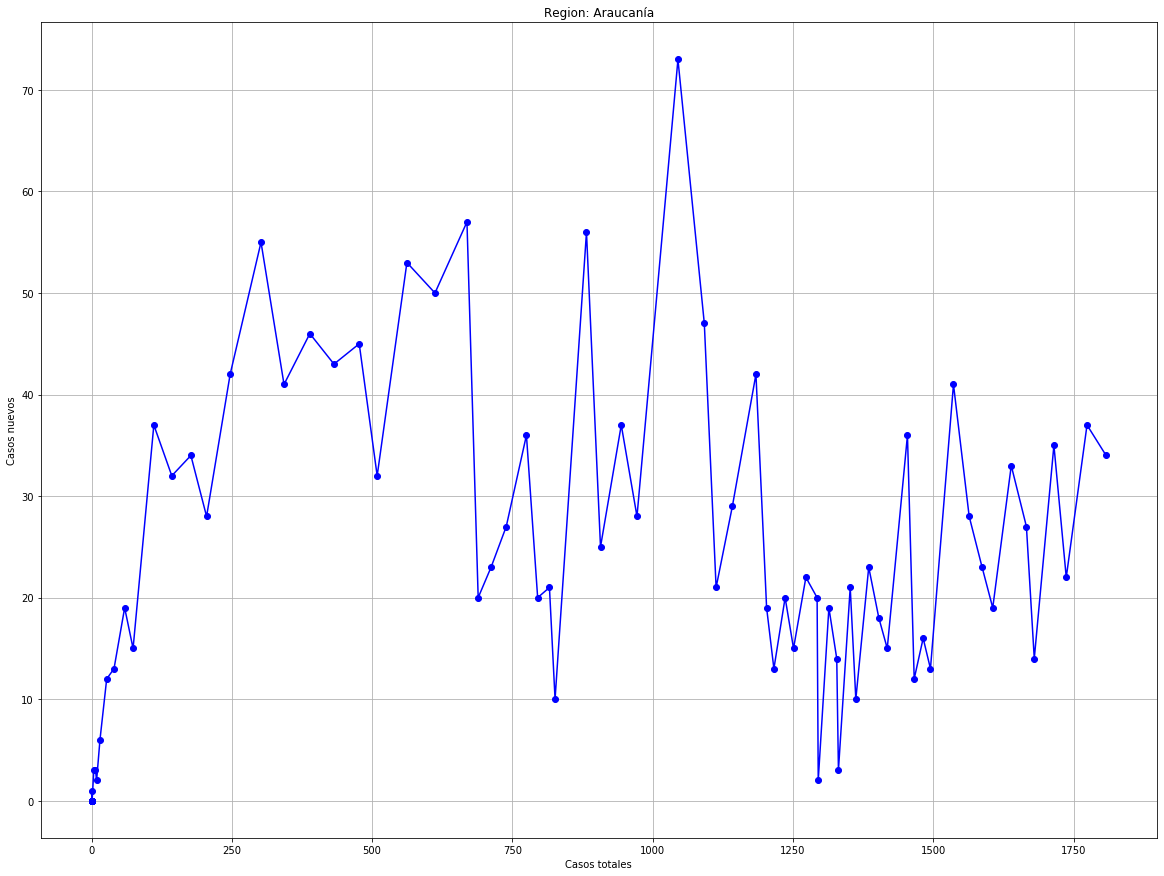

In [5]:
graph("Araucanía")

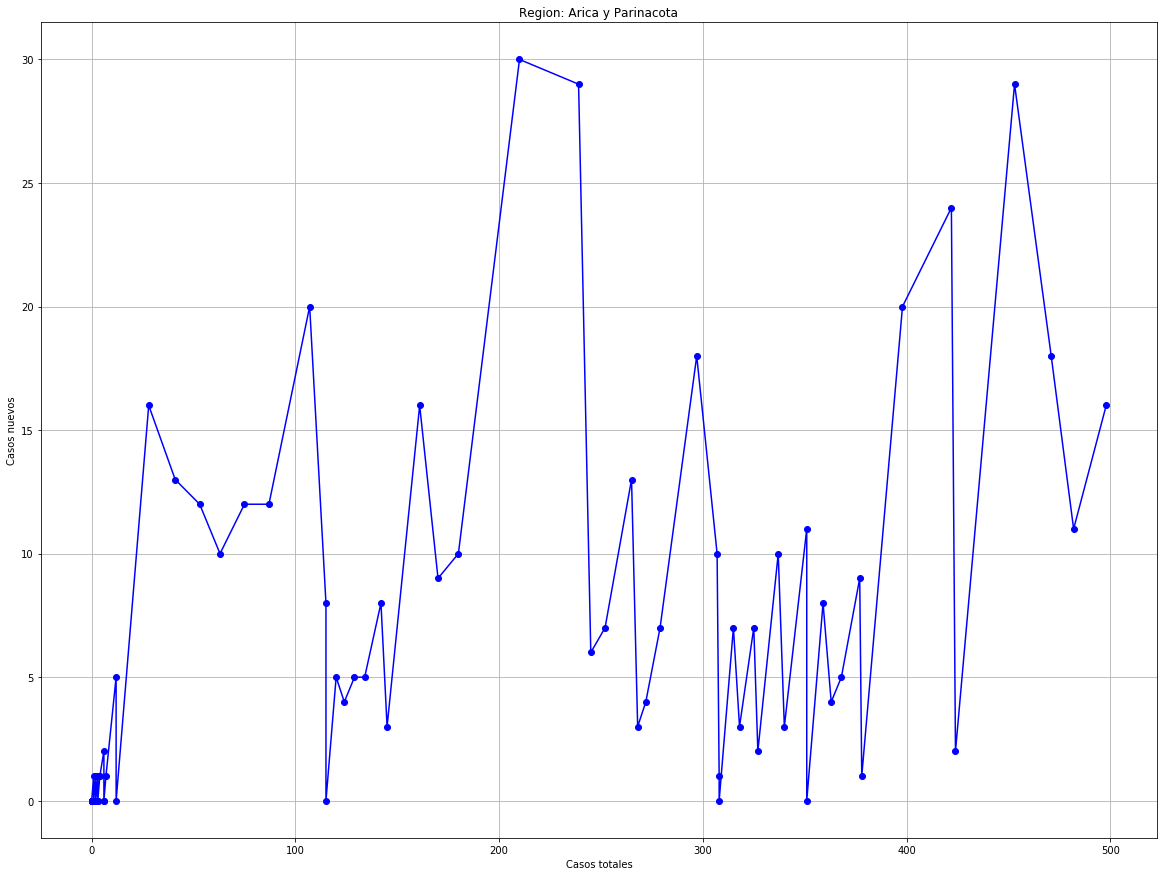

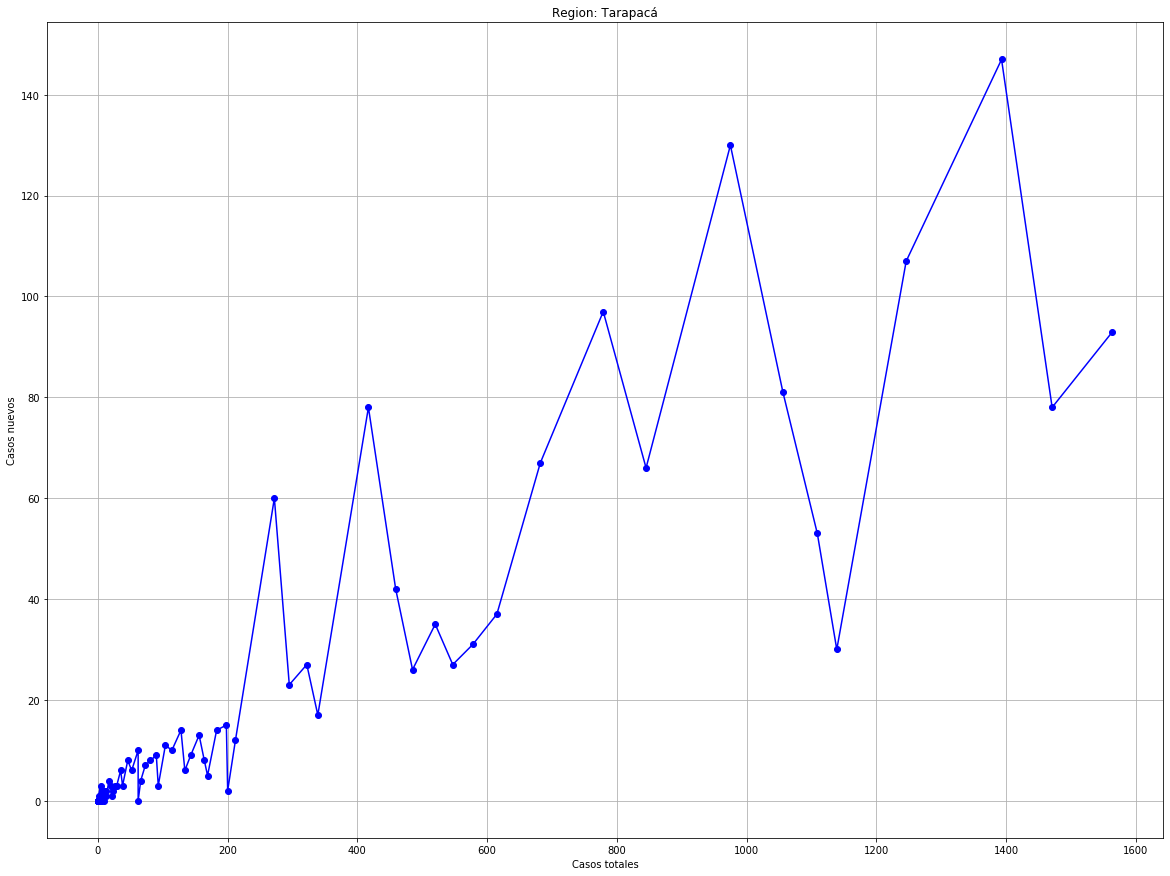

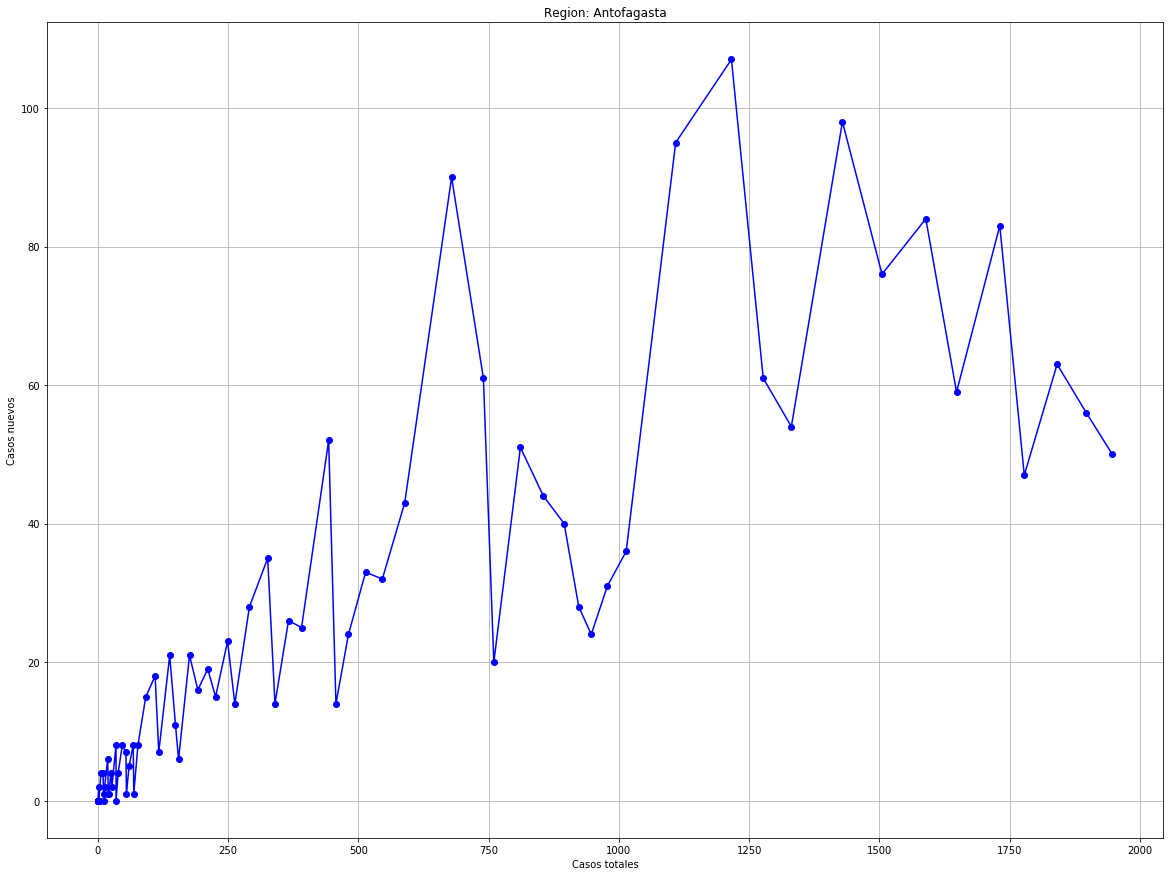

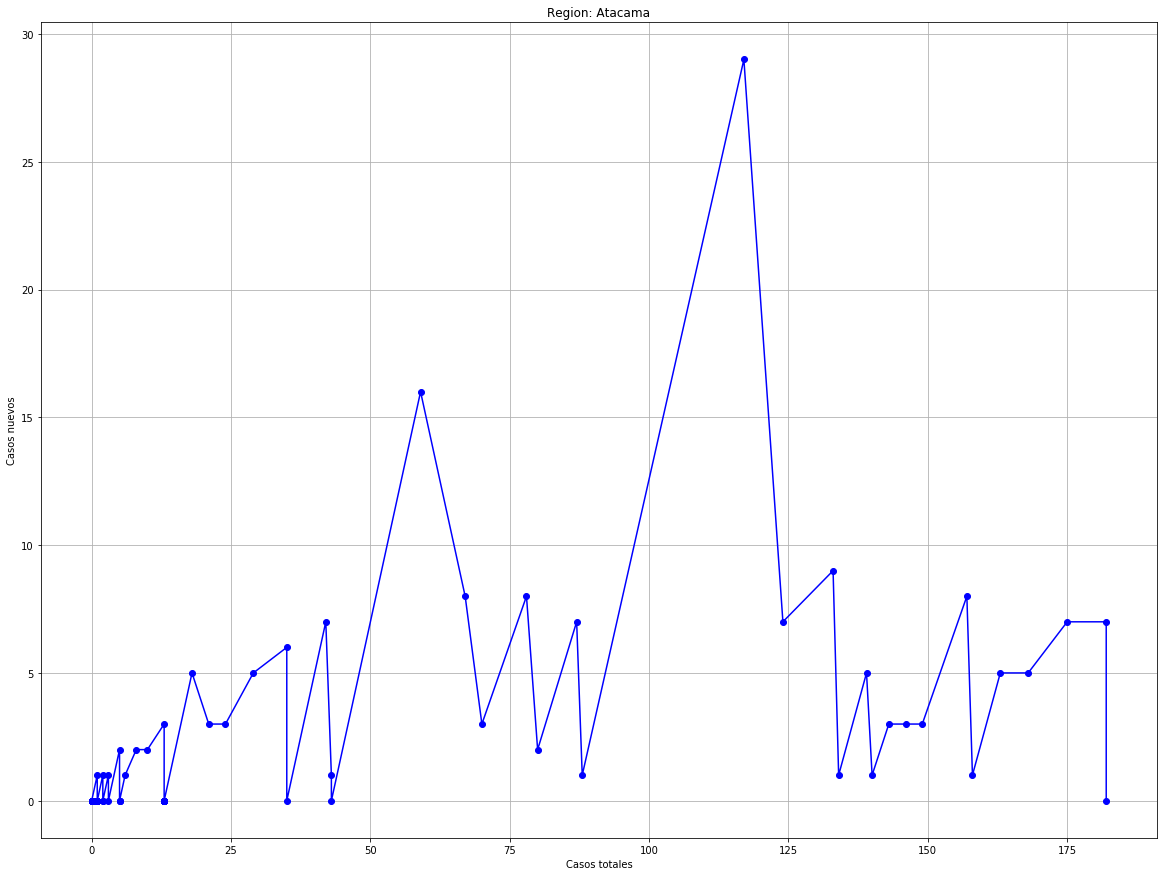

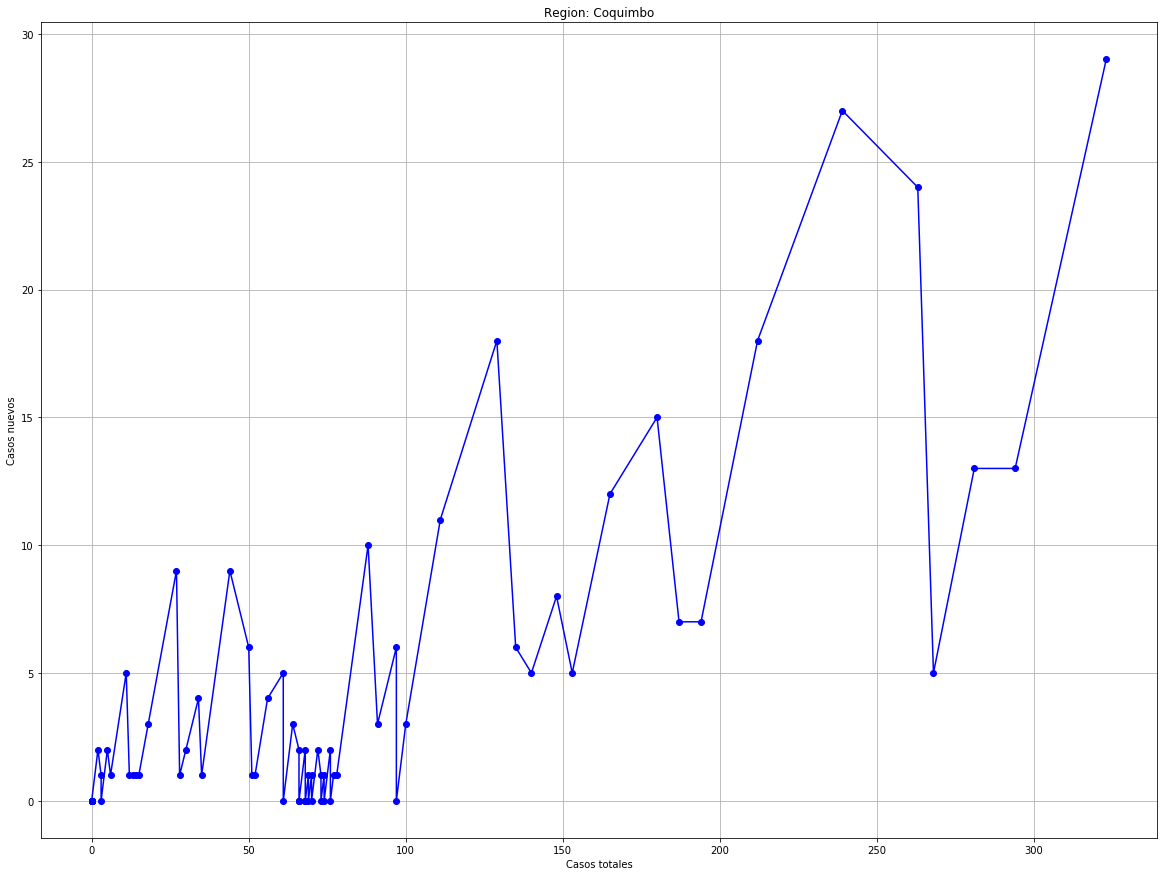

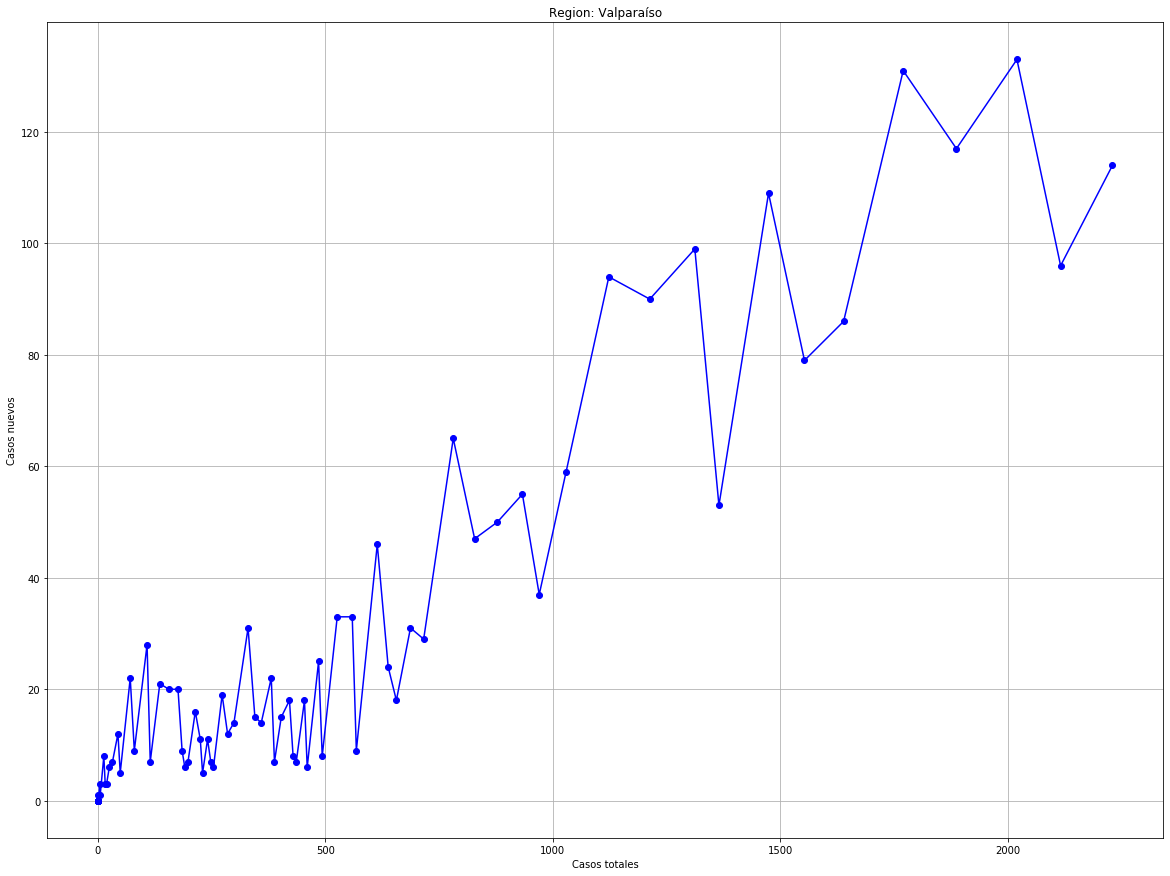

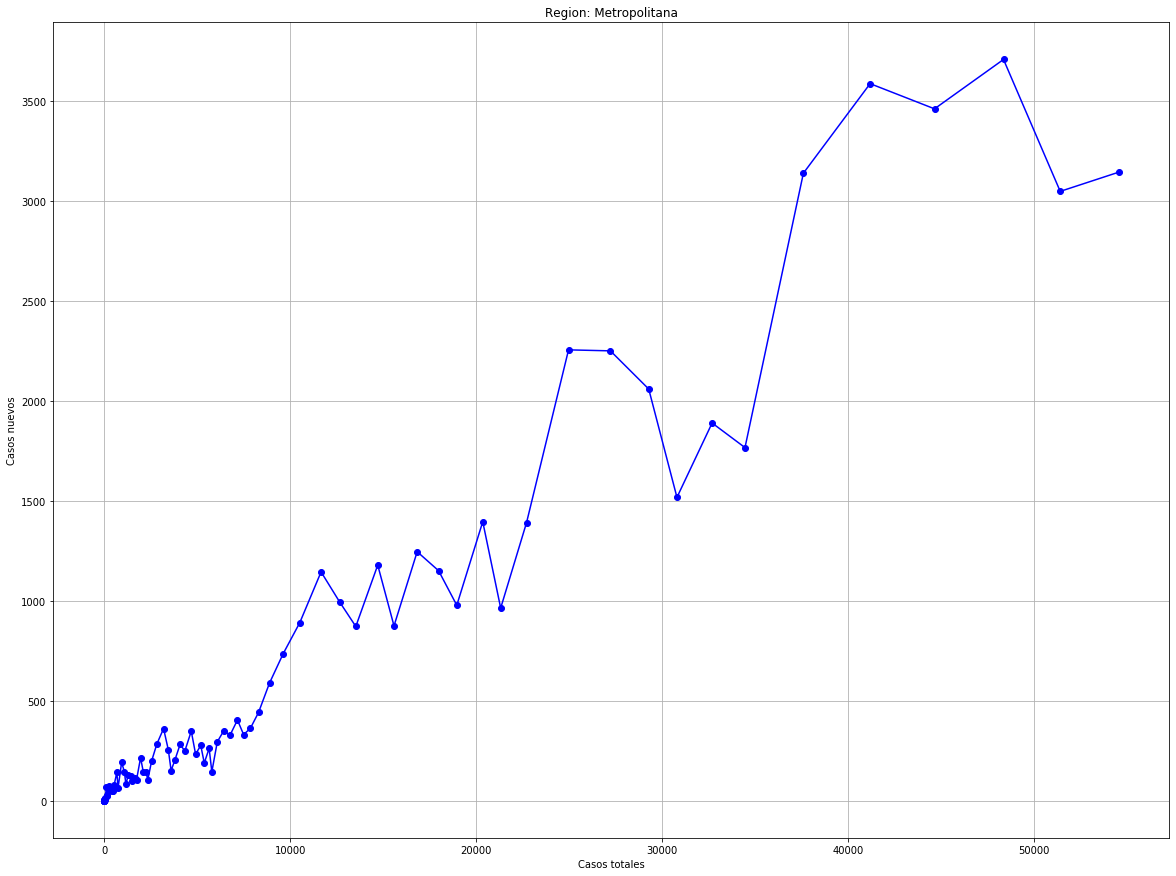

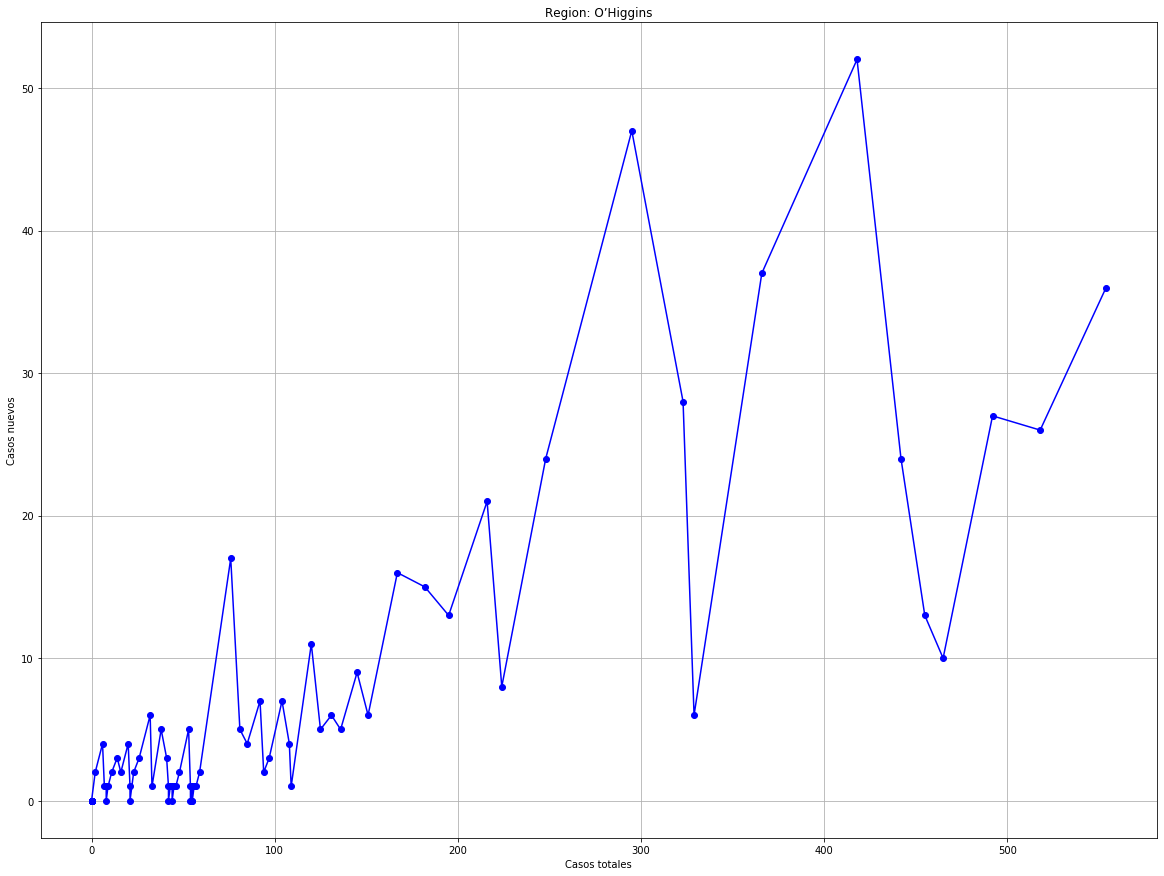

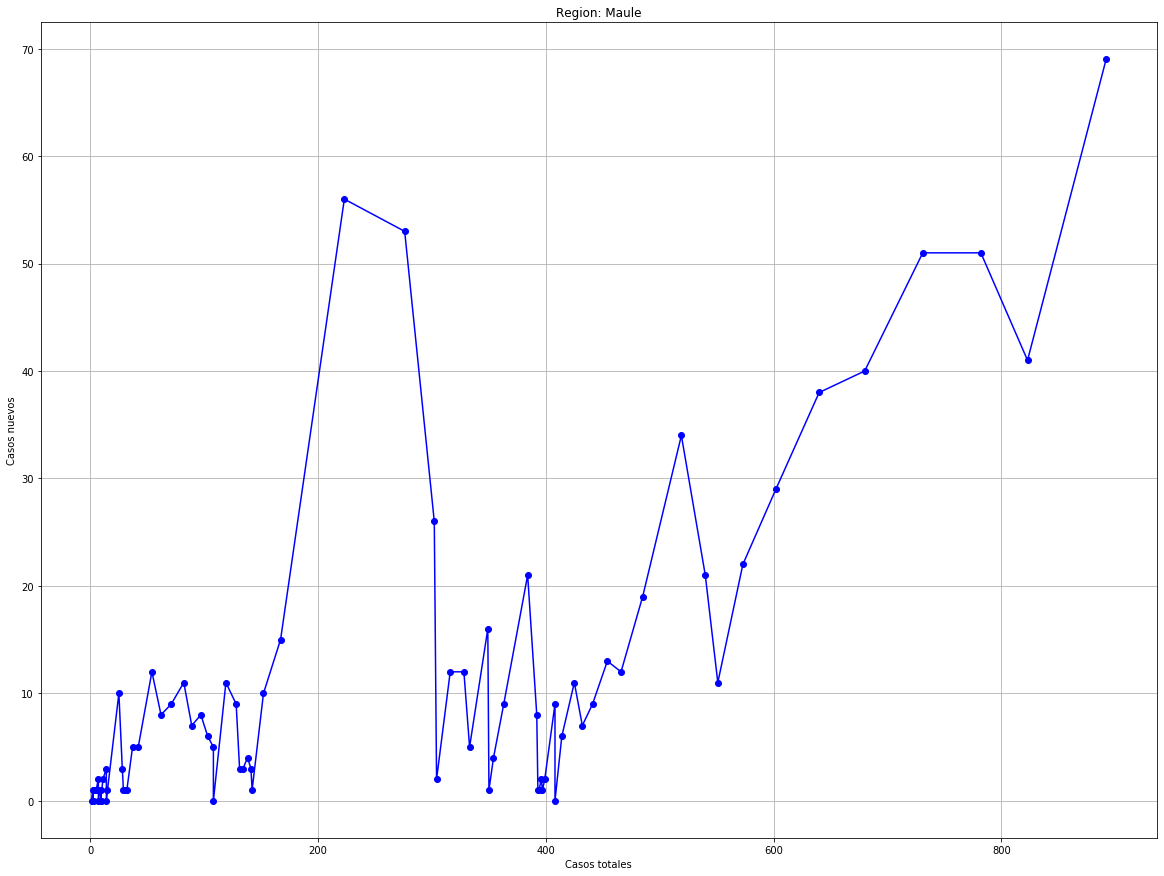

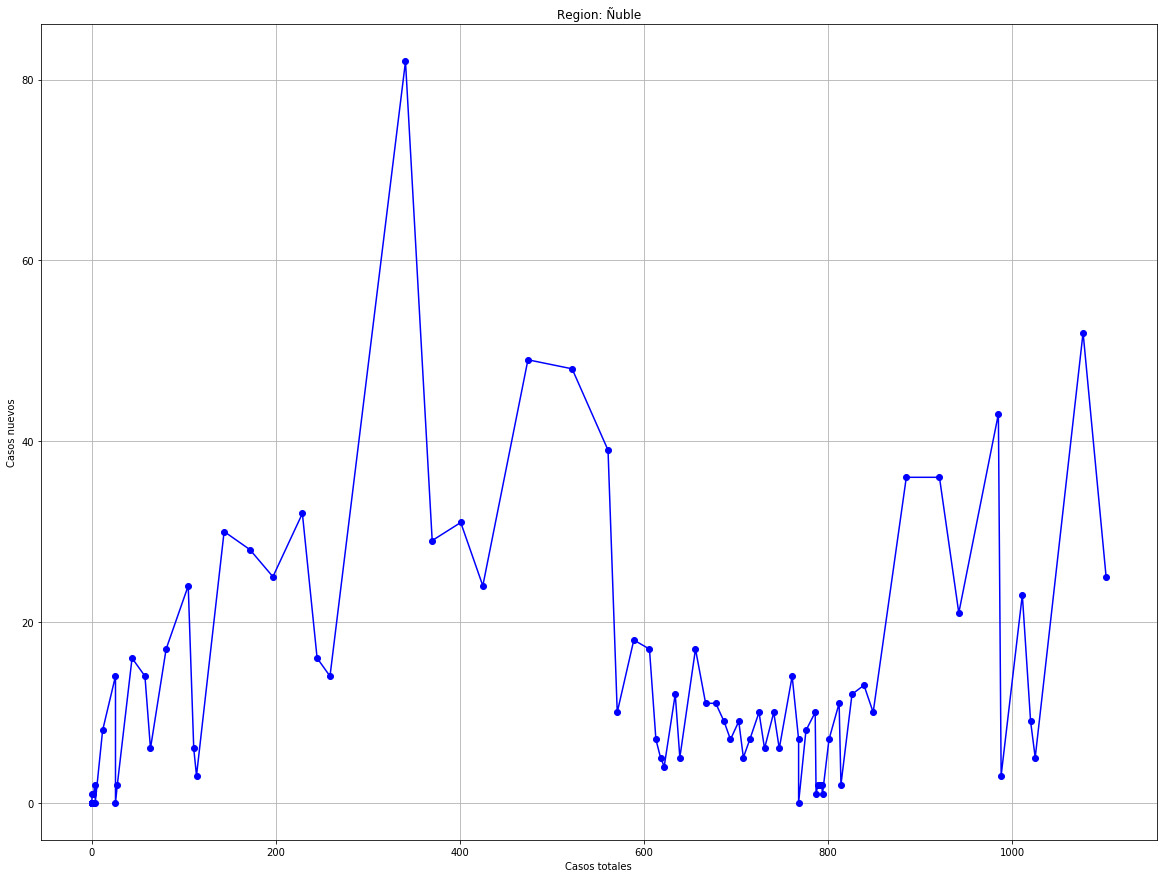

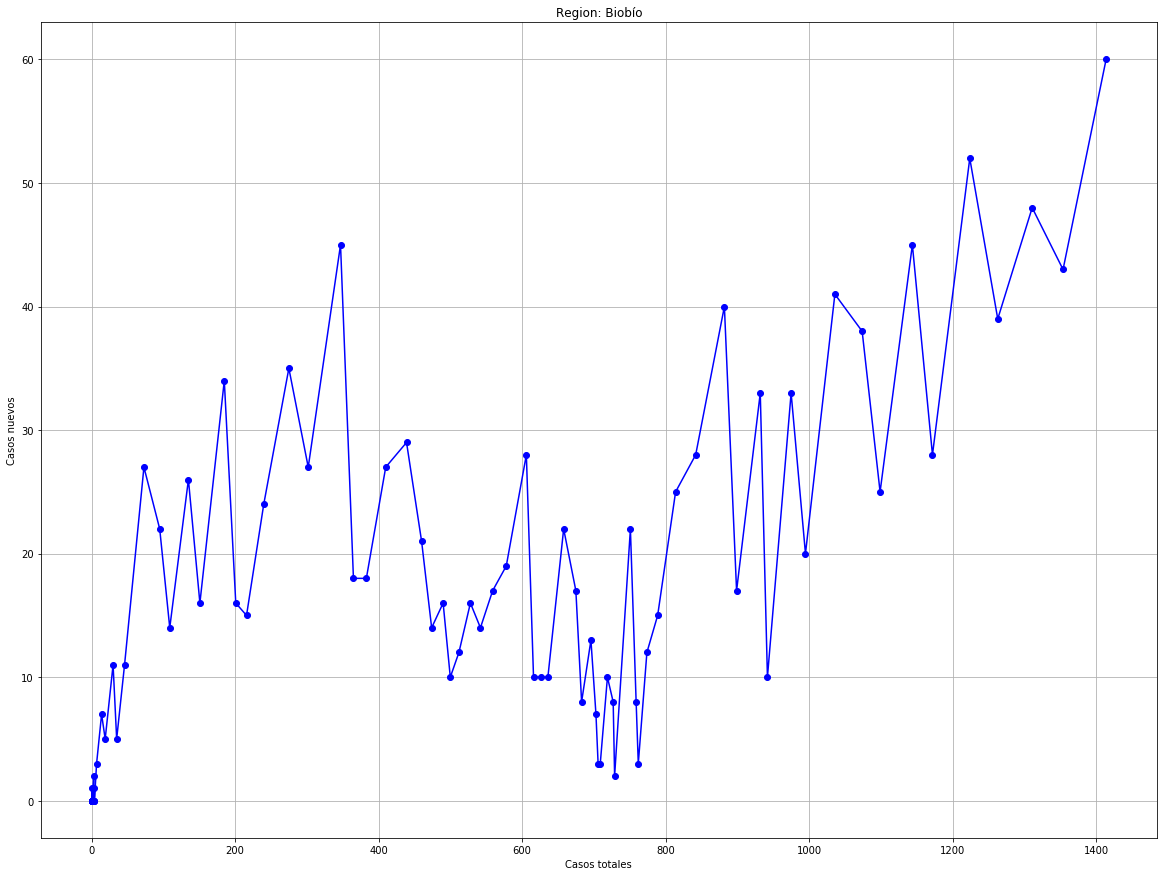

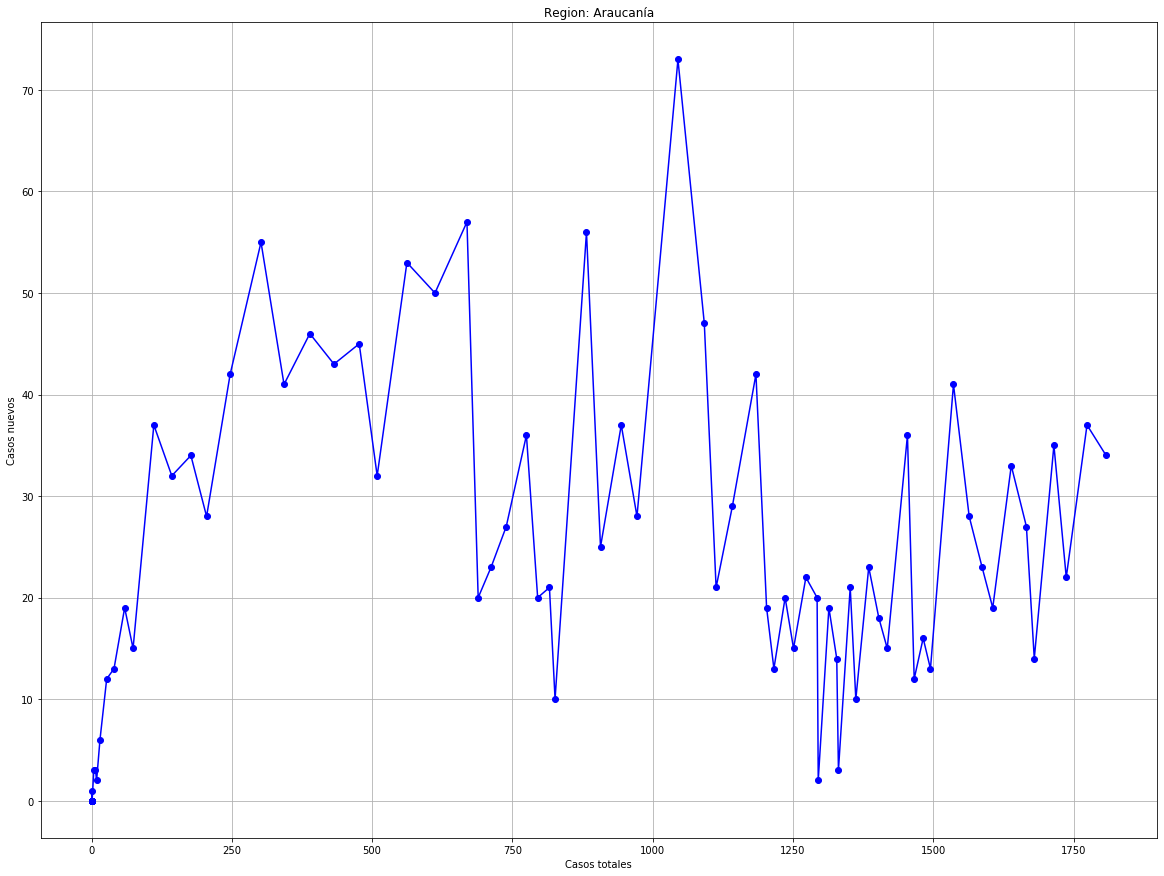

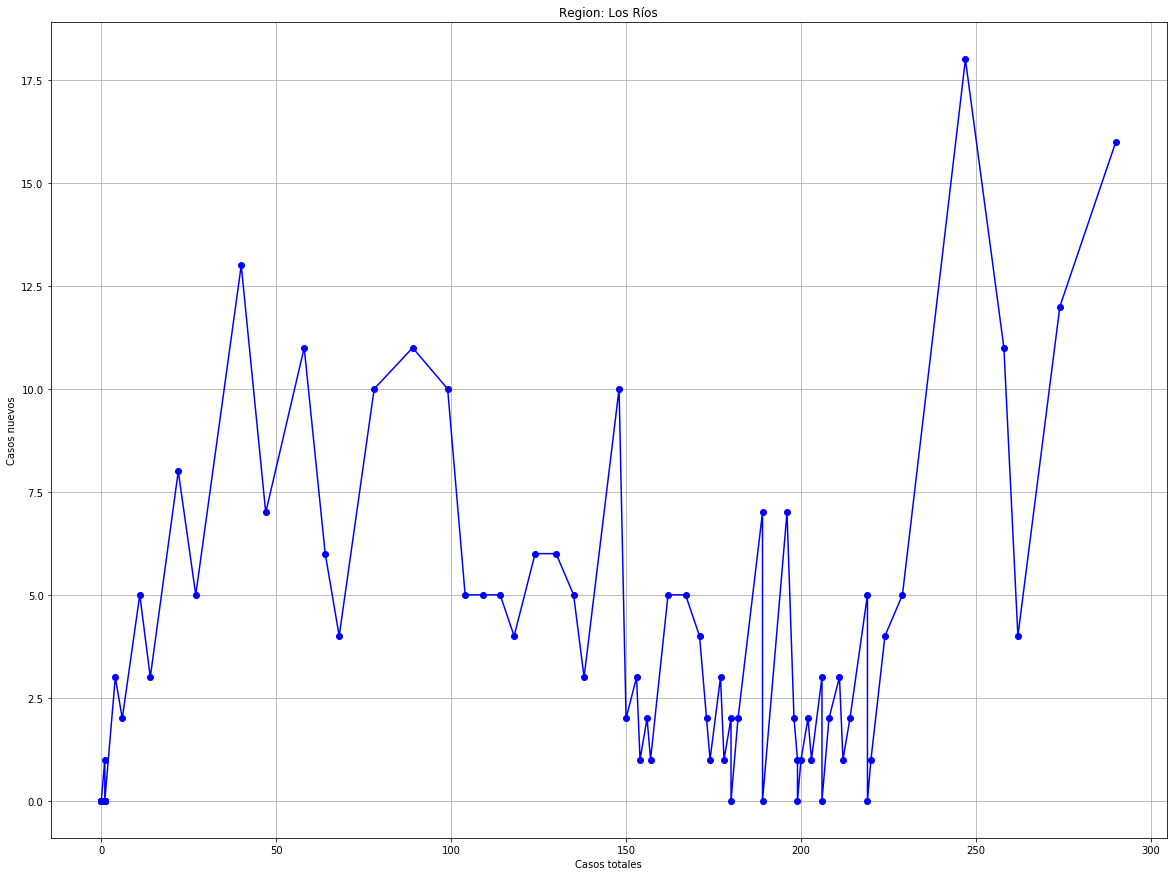

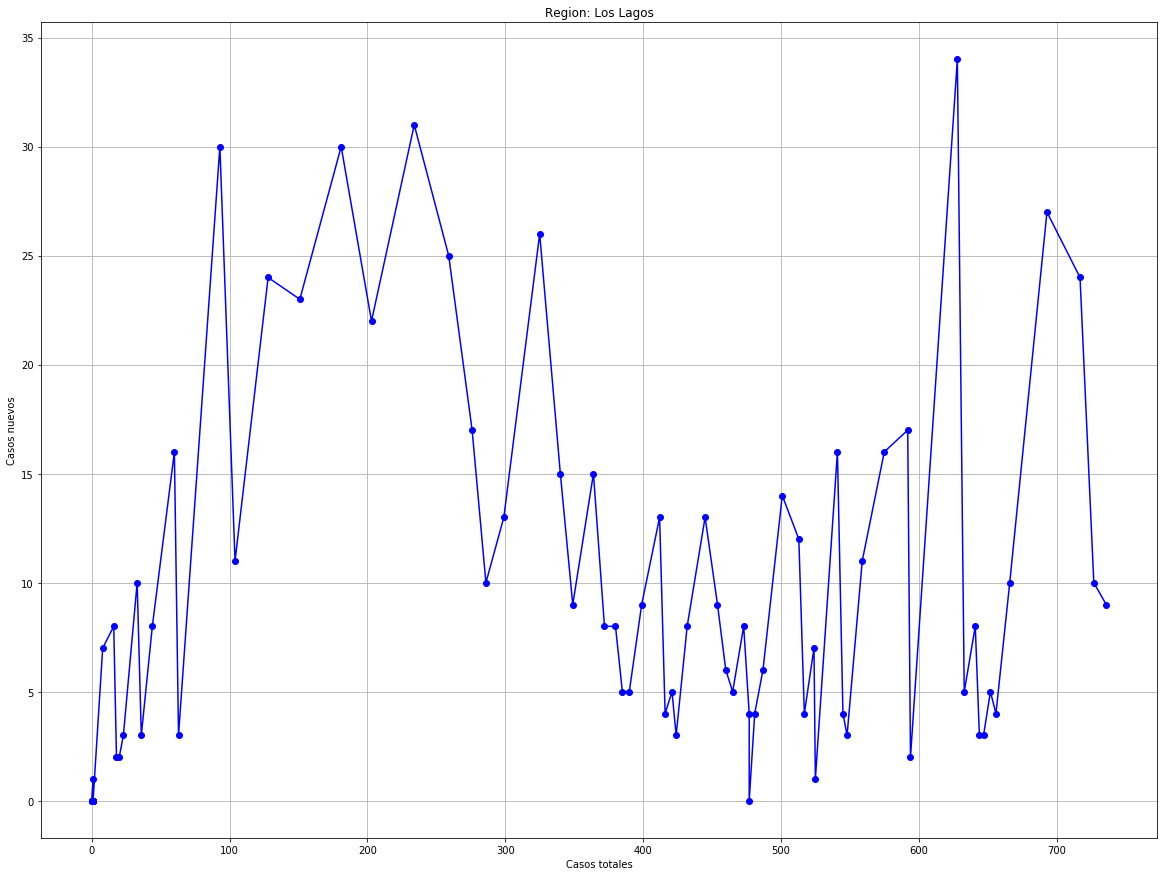

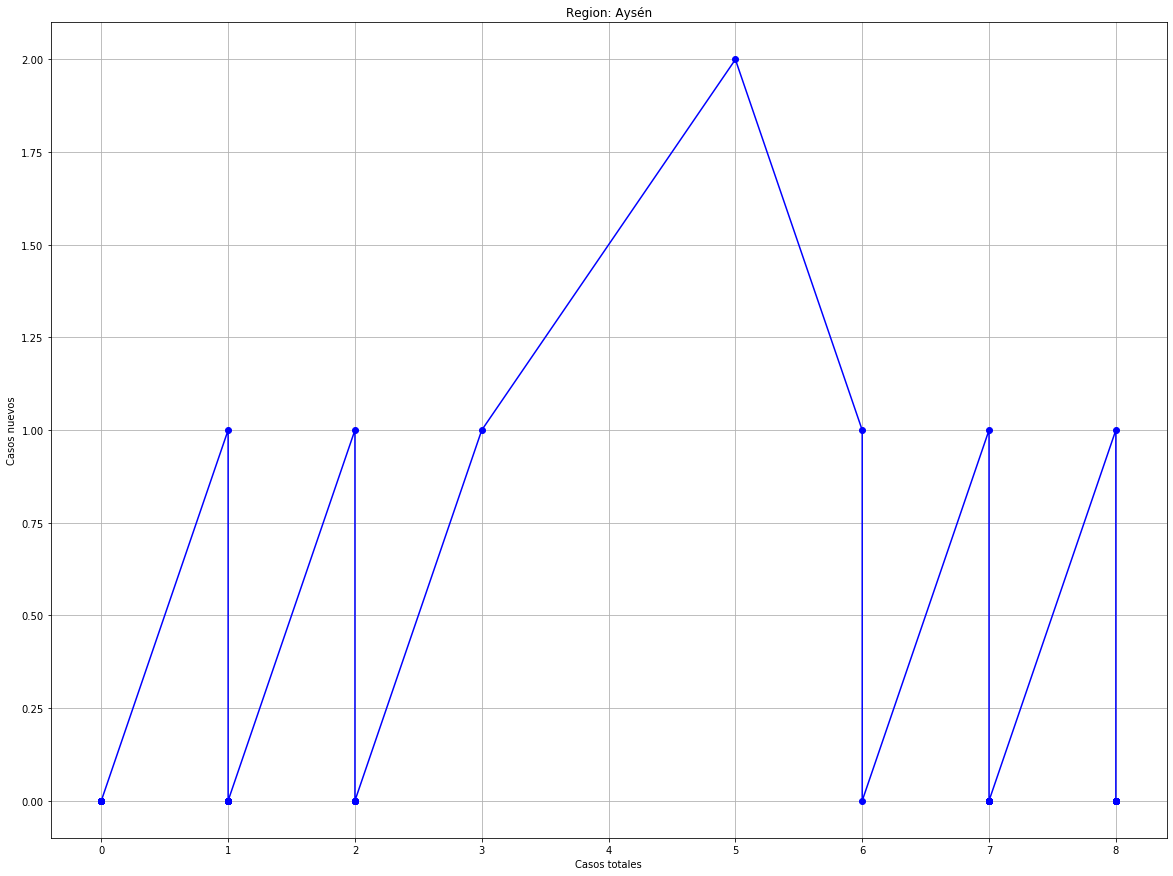

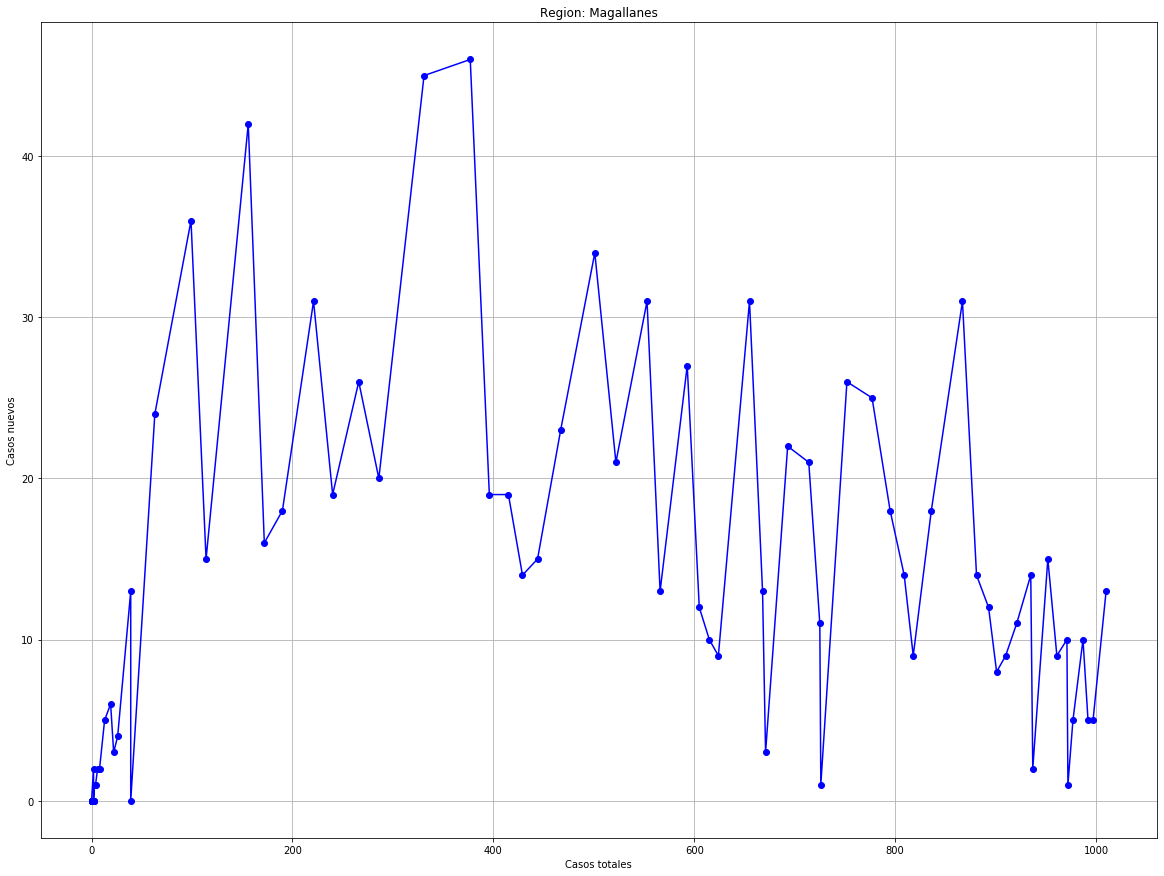

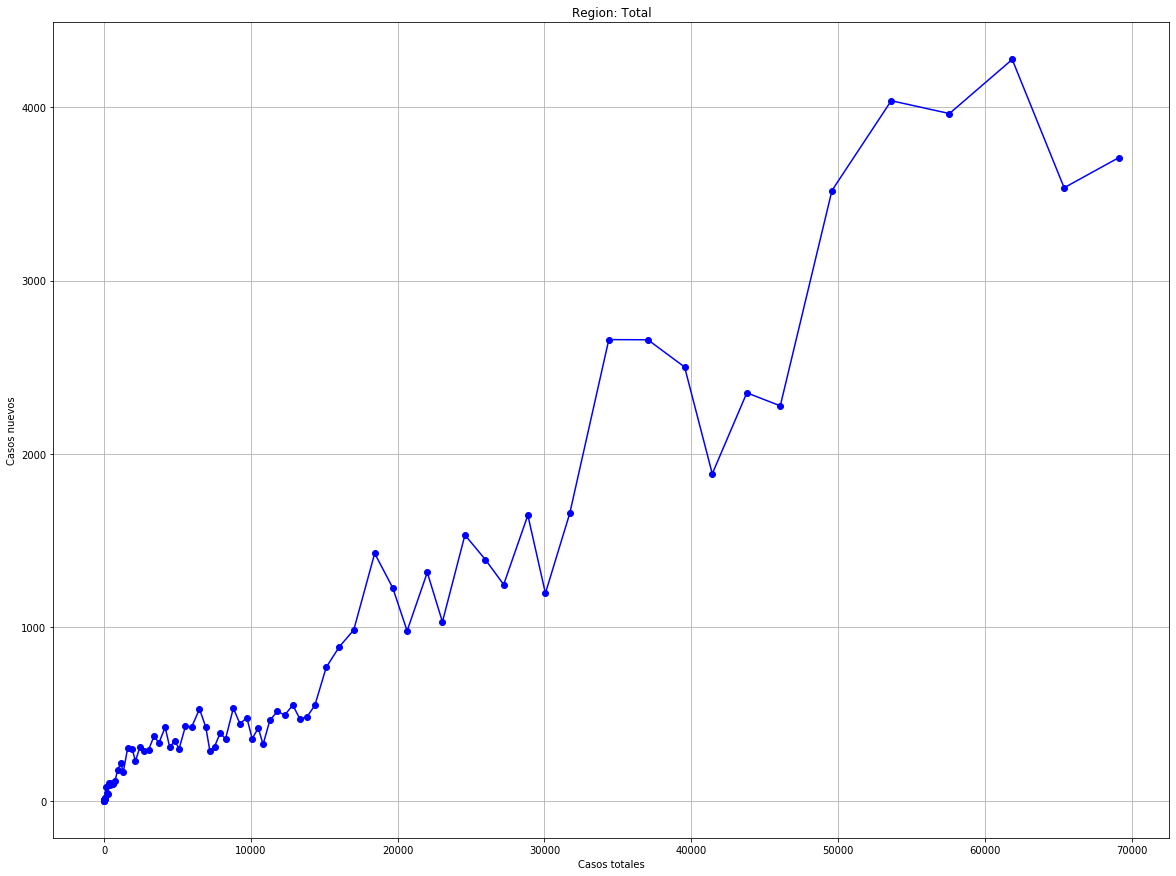

In [6]:
regiones = data_acumulados.columns[1:]
for region in regiones:
    graph(region)

In [9]:
interact(graph,
         region = regiones)
None

interactive(children=(Dropdown(description='region', options=('Arica y Parinacota', 'Tarapacá', 'Antofagasta',…